# Homework 5, problem 11.3

Take $m=50$, $n=12$.  Using MATLAB's linspace, define $t$ to be the $m$-vector corresponding to linearly spaced grid points from 0 to 1. Using MATLAB's vander and fliplr, define $A$ to be the $m\times n$ matrix associated with the least squares fiting on this grid by a polynomial of degree $n-1$.  Take $b$ to be the function $\cos(4t)$ evaluated on the grid. Now, calculate and print (to sixteen-digit precision) the least squares coefficient vector $x$ by six methods:

	 	\item The calculations above will produce six lists of twelve coefficients. In each list, shade with red pen the digits that appear to be wrong (affected by round off error). Comment on what differences you observe. Do the normal equations exhibit instability? You do not have to explain your observations.

In [69]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt

# set image parameters
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80

plt.rcParams['font.size'] = 25
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

In [111]:
m , n = 50 , 12
t = np.linspace(0,1,m)
A = np.array([t**kk for kk in range(n)]).T
b = np.cos(4*t)

# Store the coefficient results in a single array
Results = np.zeros((6,n))
# Function that does the plotting for each case
def plot_res(coefs,label):
    poly = '$ \cos(\,4t\,) \sim '
    for kk,val in enumerate(x[::-1]):
        poly+= ' %.2fx^{%s}'%(val,n-kk-1)
        if kk < n-1:
            poly+= ' + '
        if kk == 5:
            poly+= '$\n$'
    poly+='$'
    
    xx = np.linspace(0,1,50)
    yy = np.polyval(coefs[::-1],xx)
    plt.plot(xx,yy,label=label)
    cos4t = np.cos(4*xx)
    plt.plot(xx,cos4t,label= '$\cos(\,4t\,)$')
    plt.xlabel('t')
    plt.legend()
    plt.title(poly)
    plt.show()
    
    plt.plot(xx,np.abs(yy-cos4t))
    plt.title('Error between $\cos(\,4t\,)$ and the approximation')
    plt.ylabel('Absolute Error, (log scale)')
    plt.yscale('log')
    plt.xlabel('t')
    plt.show()

## ( 1 ) Formation and solution of the normal equations, using MATLABS $\backslash$

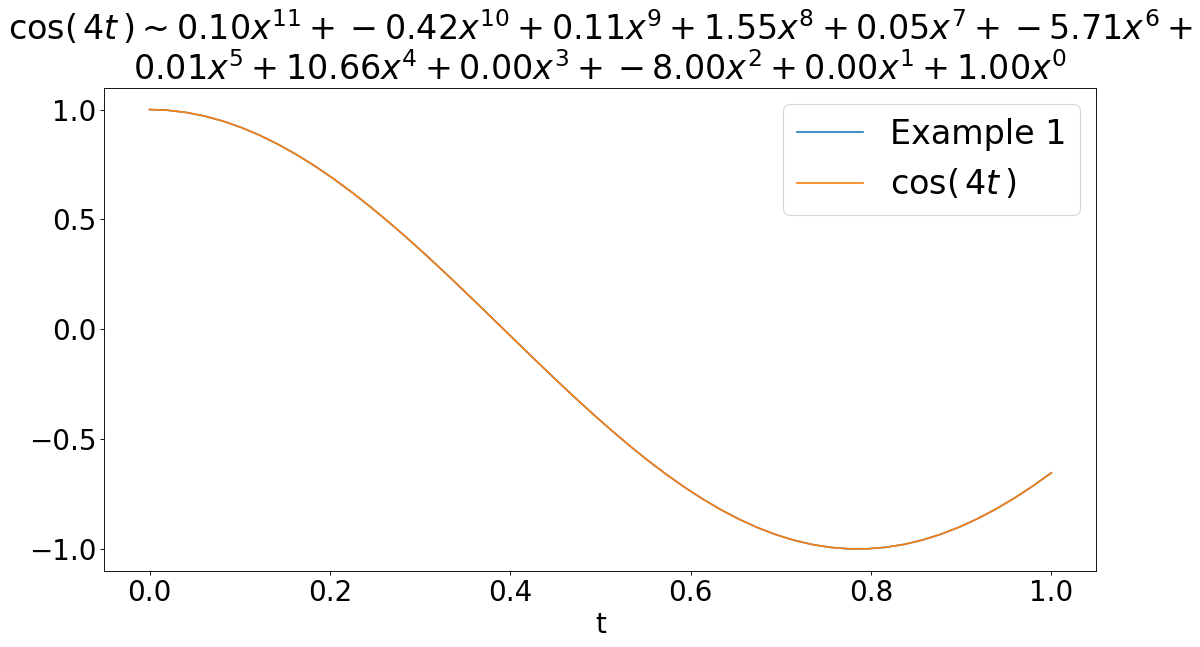

(50,) (50,)


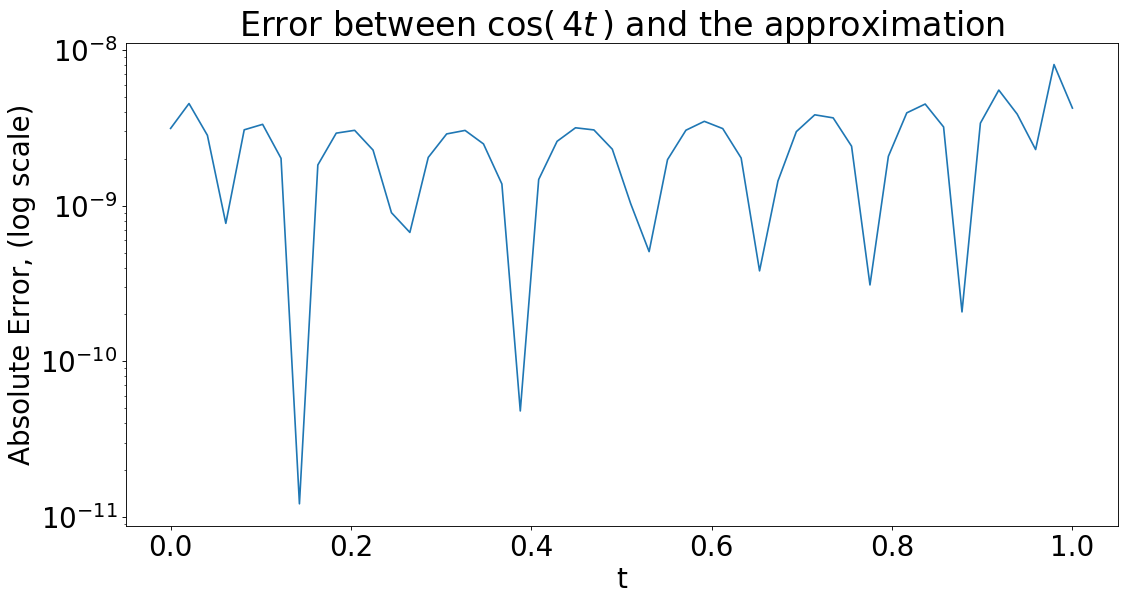

In [114]:
res_index = 0

# Following Algorithm 11.1: Least Squares via Normal Equations
AsA = A.T.conj()@A
# L L^* = A^* A
L = np.linalg.cholesky(AsA)
# Solve L (L^*x) = A^*b
Lsx = np.linalg.solve(L,A.T.conj()@b)
# Solve L^*x = Lsx
x = np.linalg.solve(L.T.conj(),Lsx)
Results[res_index,:] = x
plot_res(x,'Example 1')

## ( 2 ) QR factorization computed by mgs (Exercise 8.2 from HW 4)

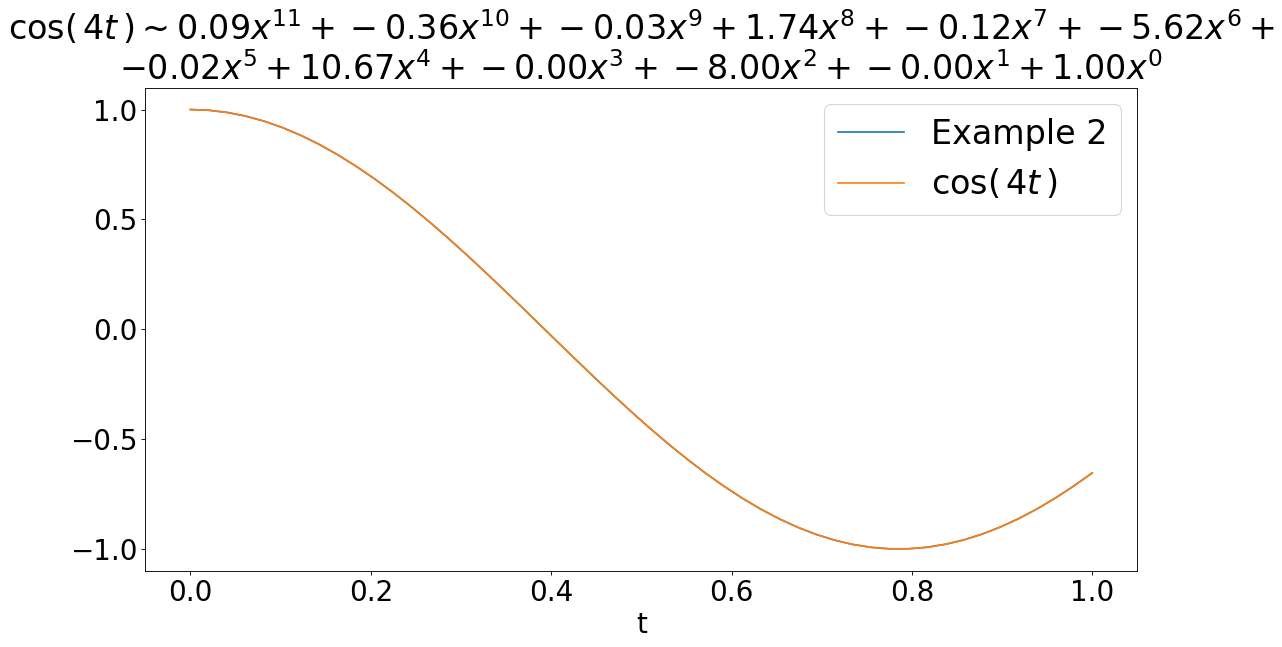

(50,) (50,)


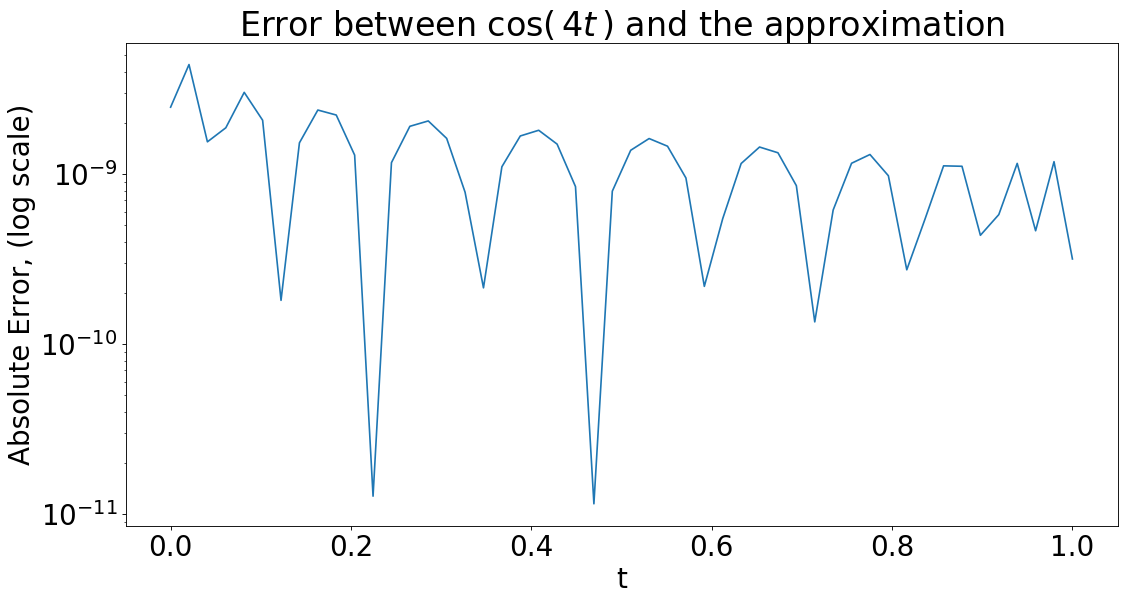

In [115]:
from Math_575a_functions import mgs

res_index = 1

Q,R = mgs(A)
x = np.linalg.solve(R,Q.T.conj()@b)

Results[res_index,:] = x
plot_res(x,'Example 2')

## ( 3 ) QR factorization computed by house

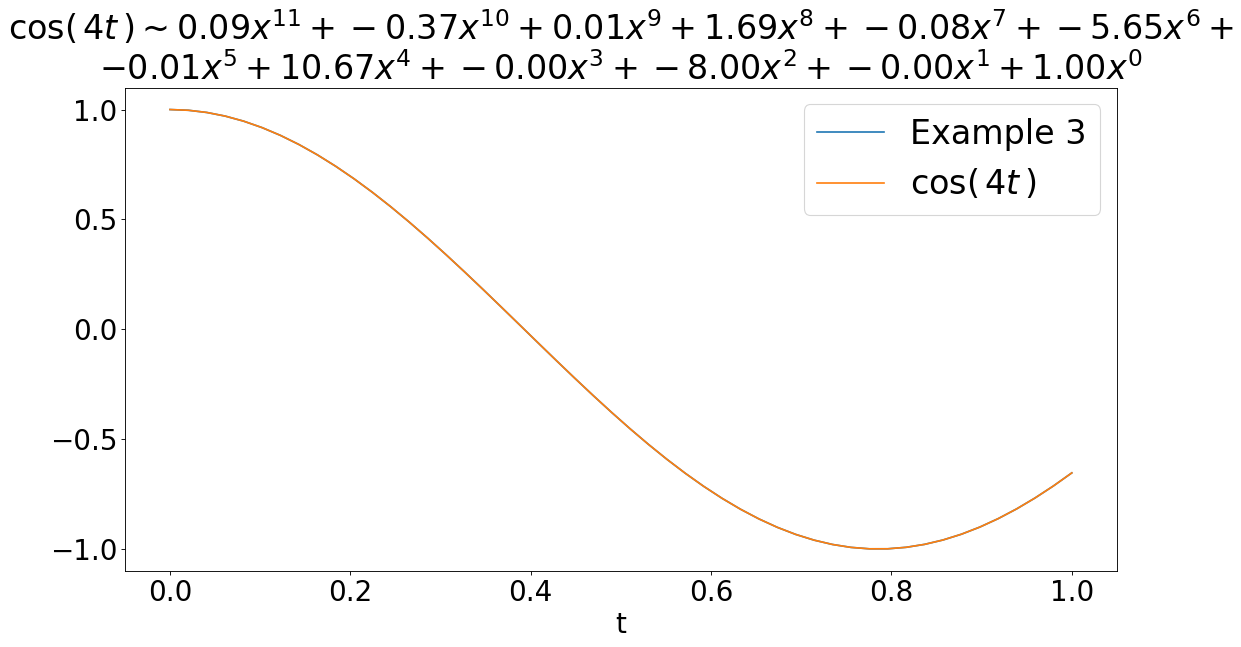

(50,) (50,)


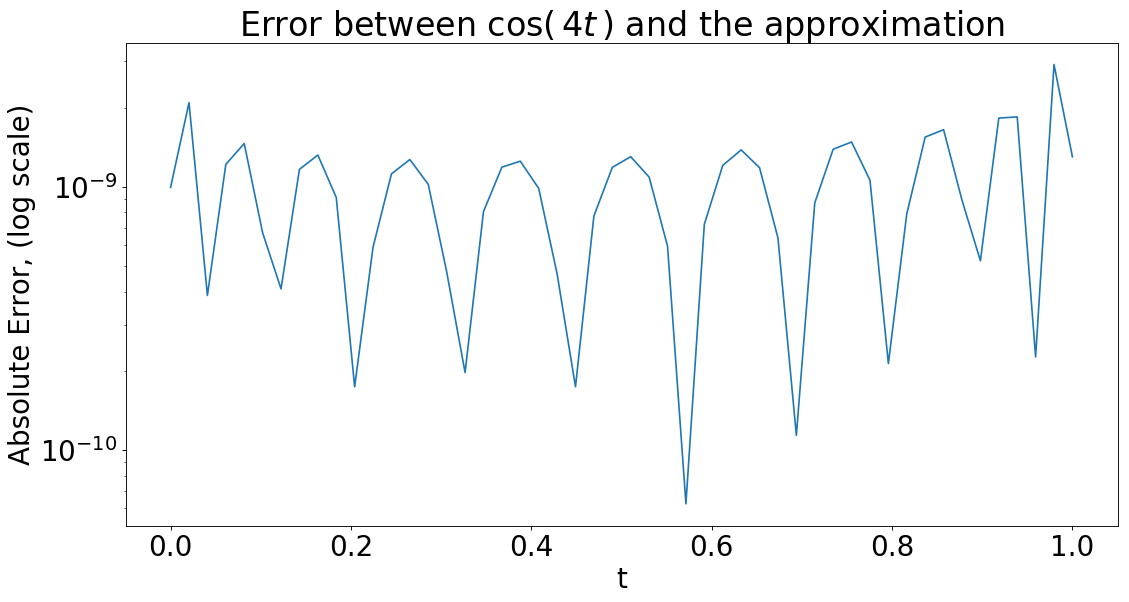

In [119]:
from Math_575a_functions import house, formQ

res_index = 2

W,R = house(A)
Q = formQ(W)
Q_hat = Q[:,:n]
R_hat = R[:n,:n]

x = np.linalg.solve(R_hat,Q_hat.T.conj()@b)

Results[res_index,:] = x
plot_res(x,'Example 3')

## (4) QR factorization computed by Python's qr

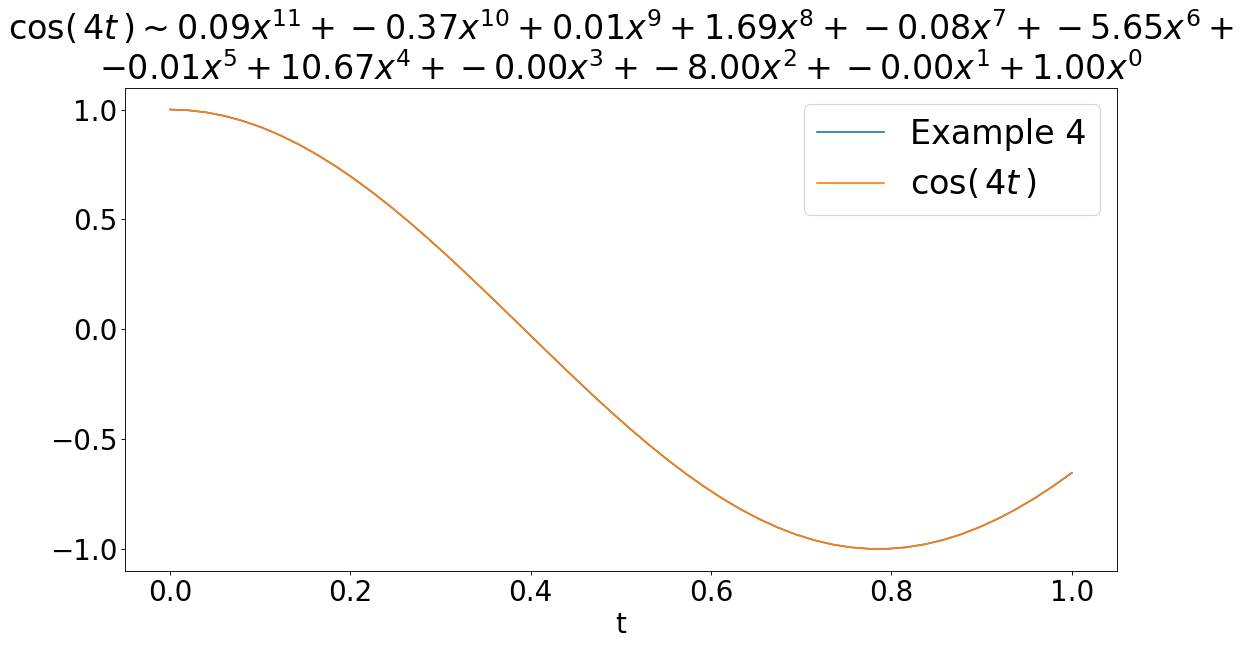

(50,) (50,)


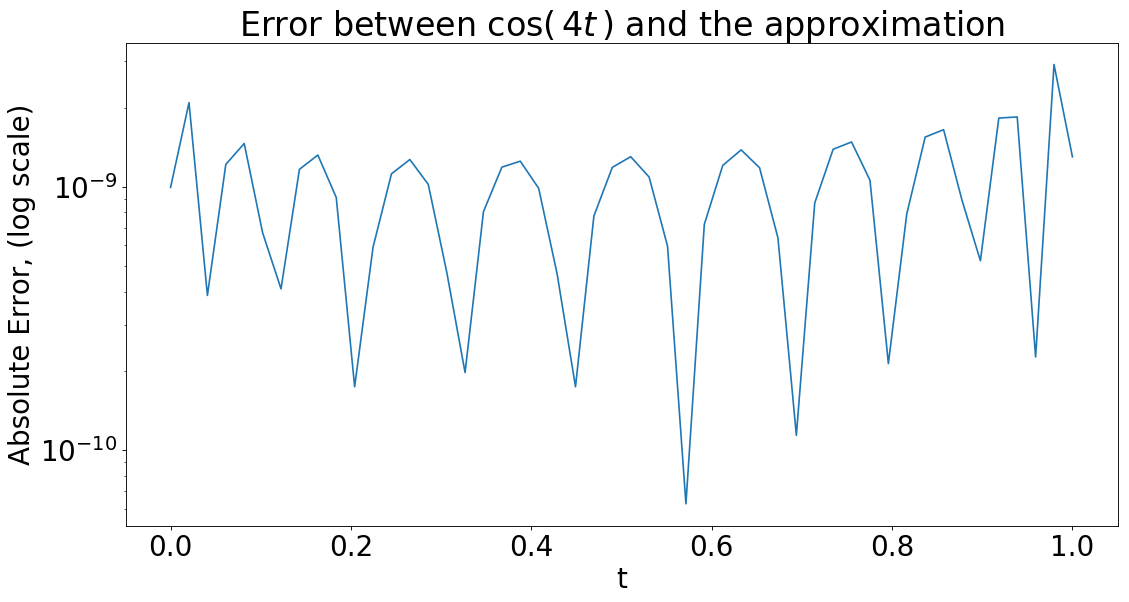

In [122]:
from Math_575a_functions import house, formQ

res_index = 3

Q,R = np.linalg.qr(A)

x = np.linalg.solve(R,Q.T.conj()@b)

Results[res_index,:] = x
plot_res(x,'Example 4')

## ( 5 ) $x = A\backslash b$ (Also based on QR factorization)

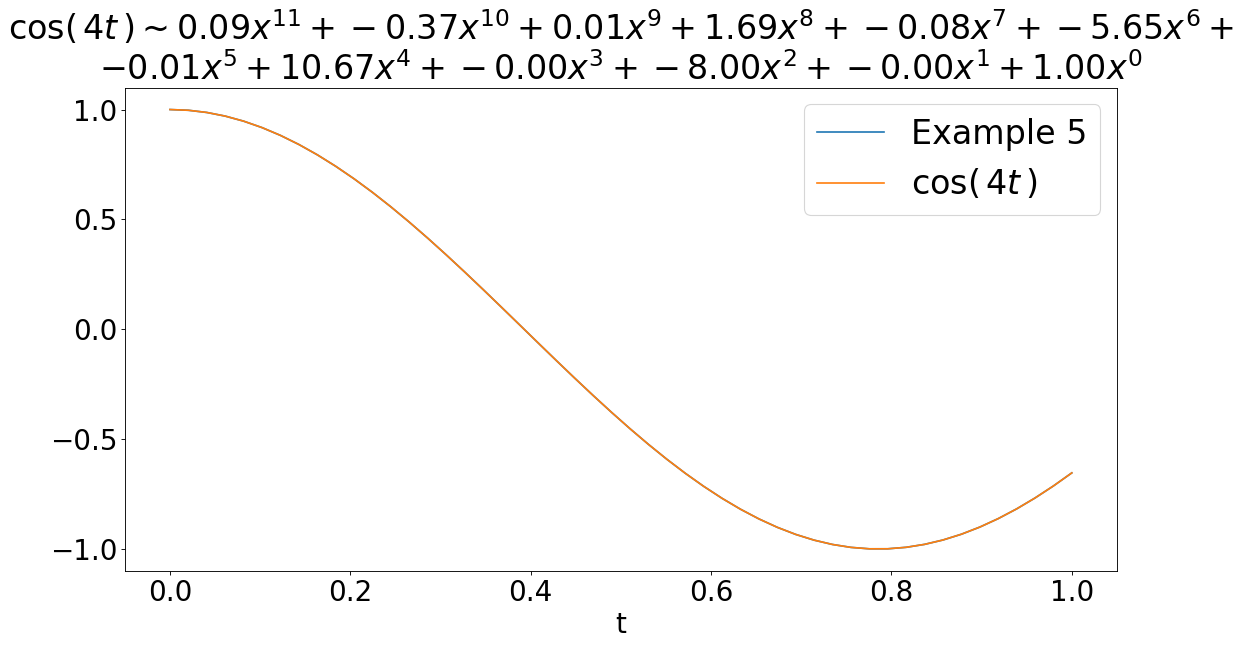

(50,) (50,)


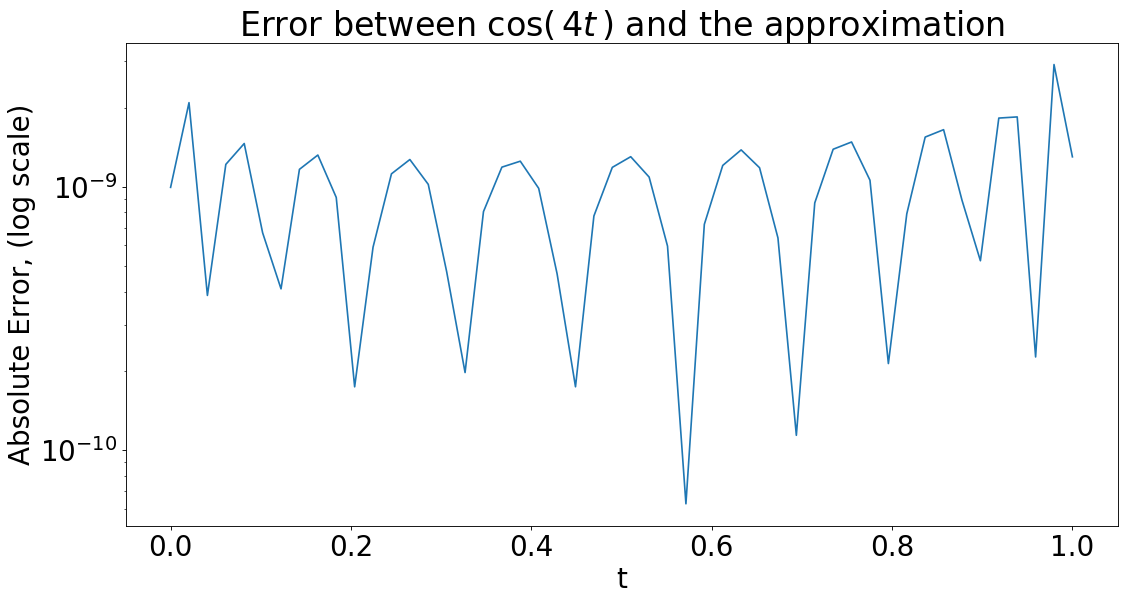

In [129]:
res_index = 4

x = np.linalg.lstsq(A,b)[0]

Results[res_index,:] = x
plot_res(x,'Example 5')

# ( 6 ) SVD

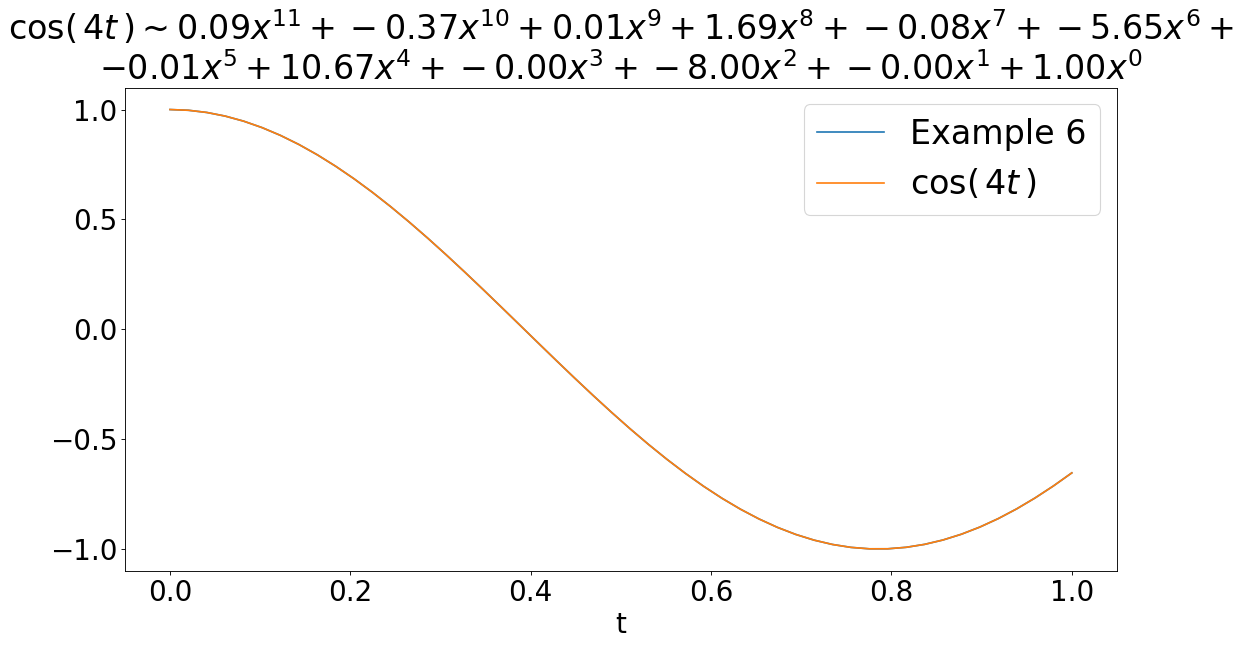

(50,) (50,)


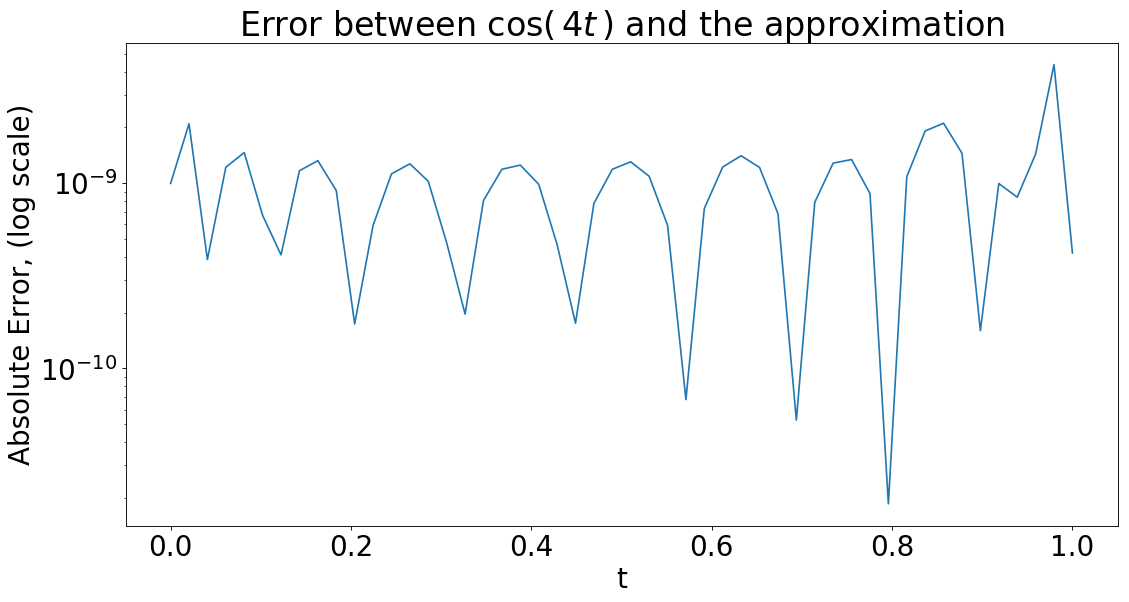

In [144]:
res_index = 5

U,D,V = np.linalg.svd(A)
U = U[:,:n]
x = V.T.conj()@np.diag(D**(-1))@U.T.conj()@b

Results[res_index,:] = x
plot_res(x,'Example 6')